In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, timedelta
import itertools
import os
os.environ["OMP_NUM_THREADS"] = "4"

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [9]:
# 1fE

# Paths organized by split type and dataset 
paths = {
    "coop": {
        10: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1fE\split_10_coop_time_averages.csv',
        20: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1fE\split_20_coop_time_averages.csv',
        30: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1fE\split_30_coop_time_averages.csv',
        40: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1fE\split_40_coop_time_averages.csv',
        50: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1fE\split_50_coop_time_averages.csv',
        60: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1fE\split_60_coop_time_averages.csv',
        70: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1fE\split_70_coop_time_averages.csv',
        80: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1fE\split_80_coop_time_averages.csv',
        90: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1fE\split_90_coop_time_averages.csv'
    },
    "tafeng": {
        10: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1fE\split_10_tafeng_time_averages.csv',
        20: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1fE\split_20_tafeng_time_averages.csv',
        30: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1fE\split_30_tafeng_time_averages.csv',
        40: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1fE\split_40_tafeng_time_averages.csv',
        50: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1fE\split_50_tafeng_time_averages.csv',
        60: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1fE\split_60_tafeng_time_averages.csv',
        70: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1fE\split_70_tafeng_time_averages.csv',
        80: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1fE\split_80_tafeng_time_averages.csv',
        90: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1fE\split_90_tafeng_time_averages.csv'
    }
}


In [10]:
# 1vR

# Paths organized by split type and dataset 
# paths = {
#     "coop": {
#         10: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1vR\split_10_coop_time_averages.csv',
#         20: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1vR\split_20_coop_time_averages.csv',
#         30: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1vR\split_30_coop_time_averages.csv',
#         40: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1vR\split_40_coop_time_averages.csv',
#         50: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1vR\split_50_coop_time_averages.csv',
#         60: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1vR\split_60_coop_time_averages.csv',
#         70: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1vR\split_70_coop_time_averages.csv',
#         80: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1vR\split_80_coop_time_averages.csv',
#         90: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1vR\split_90_coop_time_averages.csv'
#     },
#     "tafeng": {
#         10: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1vR\split_10_tafeng_time_averages.csv',
#         20: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1vR\split_20_tafeng_time_averages.csv',
#         30: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1vR\split_30_tafeng_time_averages.csv',
#         40: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1vR\split_40_tafeng_time_averages.csv',
#         50: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1vR\split_50_tafeng_time_averages.csv',
#         60: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1vR\split_60_tafeng_time_averages.csv',
#         70: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1vR\split_70_tafeng_time_averages.csv',
#         80: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1vR\split_80_tafeng_time_averages.csv',
#         90: r'E:\Thesis\Legrottaglie Forgotten Items\Model\Experiments\time_results\1vR\split_90_tafeng_time_averages.csv'
#     }
# }

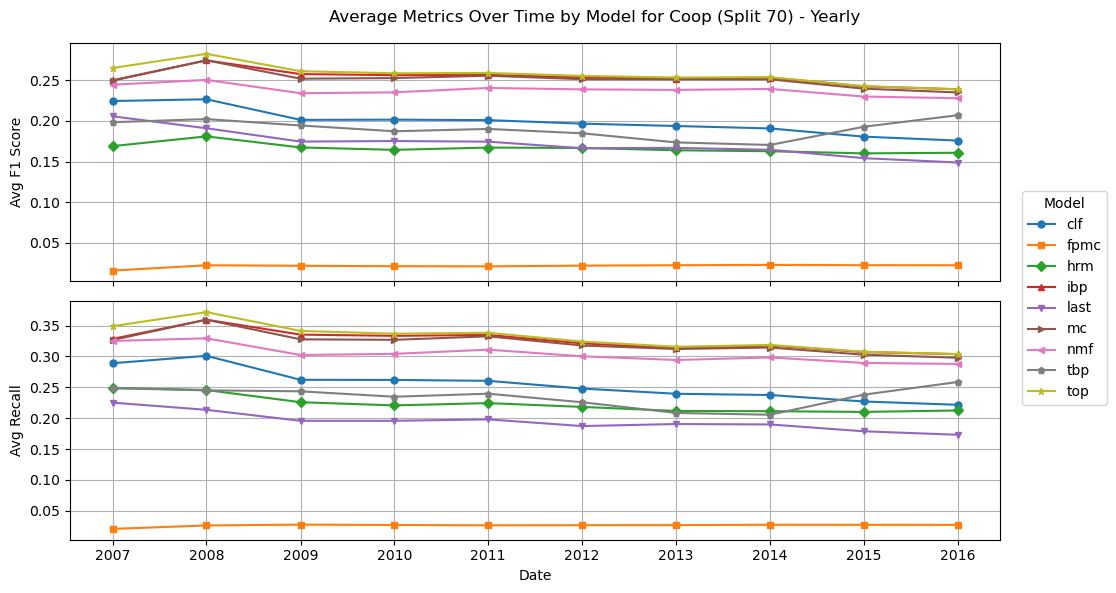

In [11]:
def plot_metrics_over_time_by_model(split, dataset, metrics=None, grouping='daily', rename_markov=False):
    """
    Plot specified metrics over time for different models with a single legend on the right.
    
    Args:
        split: The data split to use
        dataset: The dataset to analyze
        metrics: List of metrics to plot. Each metric should be a tuple of (column_name, display_name)
                Default: [('avg_f1_score', 'Avg F1 Score'), 
                         ('avg_recall', 'Avg Recall'),
                         ('avg_hit_score', 'Avg Hit Score')]
        grouping: Time grouping ('daily', 'weekly', 'monthly', 'yearly')
        rename_markov: If True, replaces 'markov' with 'mc' in model names
    """
    # Default metrics if none specified
    if metrics is None:
        metrics = [
            ('avg_f1_score', 'Avg F1 Score'),
            ('avg_recall', 'Avg Recall'),
            ('avg_hit_score', 'Avg Hit Score')
        ]

    # Load the file based on the specified split and dataset
    file_path = paths[dataset][split]
    df = pd.read_csv(file_path)

    # Convert 'date' column to datetime for proper time plotting
    df['date'] = pd.to_datetime(df['date'])

    # Rename 'markov' to 'mc' if specified
    if rename_markov:
        df['model_name'] = df['model_name'].str.replace('markov', 'mc', case=False)

    # Sort by model_name and date
    df = df.sort_values(by=['model_name', 'date'])

    # Group data based on the specified time frequency
    if grouping == 'daily':
        df['period'] = df['date'].dt.to_period('D')
    elif grouping == 'weekly':
        df['period'] = df['date'].dt.to_period('W')
    elif grouping == 'monthly':
        df['period'] = df['date'].dt.to_period('M')
    elif grouping == 'yearly':
        df['period'] = df['date'].dt.to_period('Y')
    else:
        raise ValueError("Grouping must be one of: 'daily', 'weekly', 'monthly', 'yearly'")

    # Calculate the mean for each model and time period
    agg_dict = {metric_col: ('mean') for metric_col, _ in metrics}
    df_grouped = df.groupby(['model_name', 'period']).agg(agg_dict).reset_index()
    df_grouped['date'] = df_grouped['period'].dt.to_timestamp()

    # Get a list of unique model names to plot each separately
    model_names = df_grouped['model_name'].unique()

    # Define line styles and markers to differentiate models
    line_styles = ['-', '--', '-.', ':']
    markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*']
    style_combinations = list(itertools.product(line_styles, markers))

    # Initialize the figure
    fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 3 * len(metrics)), sharex=True)
    fig.suptitle(f'Average Metrics Over Time by Model for {dataset.capitalize()} (Split {split}) - {grouping.capitalize()}')
    
    # Handle case where only one metric is plotted
    if len(metrics) == 1:
        axes = [axes]

    # Store lines for the legend
    lines = []
    labels = []

    # Plot each model's metrics on separate subplots
    for i, model in enumerate(model_names):
        model_data = df_grouped[df_grouped['model_name'] == model]
        line_style, marker = style_combinations[i % len(style_combinations)]

        for j, ((metric_col, metric_name), ax) in enumerate(zip(metrics, axes)):
            # Account for the new column names after aggregation
            plot_col = ('_').join([metric_col, 'mean']) if isinstance(df_grouped.columns, pd.MultiIndex) else metric_col
            line = ax.plot(model_data['date'], model_data[plot_col],
                         linestyle=line_style, marker=marker, markersize=5)[0]
            
            # Only store lines and labels from the first subplot for legend
            if j == 0:
                lines.append(line)
                labels.append(model)
            
            ax.set_ylabel(metric_name)
            ax.grid(True)

    # Set xlabel for the bottom subplot only
    axes[-1].set_xlabel('Date')

    # Add a single legend on the right side
    fig.legend(lines, labels, 
              title='Model',
              bbox_to_anchor=(0.85, 0.5),
              loc='center left',
              bbox_transform=fig.transFigure)

    # Adjust layout to prevent legend overlap
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.savefig('time_series_1fE.png', dpi=900, bbox_inches='tight')
    plt.show()

# Example usage:
plot_metrics_over_time_by_model(70, 'coop',
    metrics=[
        ('avg_f1_score', 'Avg F1 Score'),
        ('avg_recall', 'Avg Recall')
    ],
    grouping='yearly',
    rename_markov=True)  # Set to True to rename 'markov' to 'mc'

In [15]:
import pandas as pd
import numpy as np
from pathlib import Path

def create_last_year_comparison_table(dataset, metric='avg_f1_score', 
                                    splits=[10, 20, 30, 40, 50, 60, 70, 80, 90],
                                    output_dir='tables'):
    """
    Creates a LaTeX table comparing model performances for the last year across different splits.
    
    Args:
        dataset: str, either 'coop' or 'tafeng'
        metric: str, metric to compare ('avg_f1_score' or 'avg_recall')
        splits: list of split percentages to include
        output_dir: directory to save the .tex files
    """
    # Create output directory if it doesn't exist
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    
    # Model names in the order they should appear in the table
    model_order = ['clf', 'fpmc', 'hrm', 'ibp', 'last', 'markov', 'nmf', 
                  'tbp', 'top']
    
    # Dictionary to store results for each split
    results = {}
    
    # Process each split
    for split in splits:
        # Load the data
        df = pd.read_csv(paths[dataset][split])
        df['date'] = pd.to_datetime(df['date'])
        
        # Get the last year's data
        last_year = df['date'].max().year
        df_last_year = df[df['date'].dt.year == last_year]
        
        # Calculate means for the last year
        means = df_last_year.groupby('model_name')[metric].mean()
        results[split] = {model: means[model] for model in model_order}
    
    # Start building the LaTeX table
    table_lines = [
        "\\begin{table}[H]",
        "\\centering",
        "\\small",
        "\\setlength{\\tabcolsep}{4pt}",
        "\\begin{tabular}{@{}l@{\\hspace{4pt}}|" + "@{\\hspace{4pt}}c@{\\hspace{4pt}}" * len(model_order) + "@{}}",
        "\\hline",
        f"\\multicolumn{{{len(model_order) + 1}}}{{c}}{{Last Year {metric.replace('avg_', '').replace('_', ' ').title()} for {dataset.upper()}}} \\\\",
        "\\hline",
        "Split & " + " & ".join([f"\\textbf{{{model}}}" for model in model_order]) + " \\\\",
        "\\hline"
    ]
    
    # Add data rows
    for split in splits:
        values = [f"{results[split][model]:.3f}" for model in model_order]
        
        # Find the best and second best values
        numeric_values = [float(v) for v in values]
        best_idx = np.argmax(numeric_values)
        numeric_values[best_idx] = -np.inf  # Temporarily remove best value
        second_best_idx = np.argmax(numeric_values)
        
        # Add bold and italic formatting
        values[best_idx] = f"\\textbf{{{values[best_idx]}}}"
        values[second_best_idx] = f"\\textit{{{values[second_best_idx]}}}"
        
        # Add the row
        row = f"{split}\\% & " + " & ".join(values) + " \\\\"
        table_lines.append(row)
        
        # Add line between splits except after the last split
        if split != splits[-1]:
            table_lines.append("\\cline{1-" + str(len(model_order) + 1) + "}")
    
    # Close the table
    table_lines.extend([
        "\\hline",
        "\\end{tabular}",
        f"\\caption{{Average {metric.replace('avg_', '').replace('_', ' ').title()} for the last year across different splits}}",
        f"\\label{{tab:last_year_{metric.replace('avg_', '')}_{dataset}}}",
        "\\end{table}"
    ])
    
    # Save to file
    metric_name = metric.replace('avg_', '')
    filename = f"{output_dir}/last_year_{metric_name}_{dataset}.tex"
    with open(filename, 'w') as f:
        f.write('\n'.join(table_lines))
    
    print(f"Table saved to {filename}")

# Example usage:
# Create tables for both metrics and datasets
metrics = ['avg_f1_score', 'avg_recall']
datasets = ['coop']

for dataset in datasets:
    for metric in metrics:
        create_last_year_comparison_table(dataset, metric=metric)

Table saved to tables/last_year_f1_score_coop.tex
Table saved to tables/last_year_recall_coop.tex


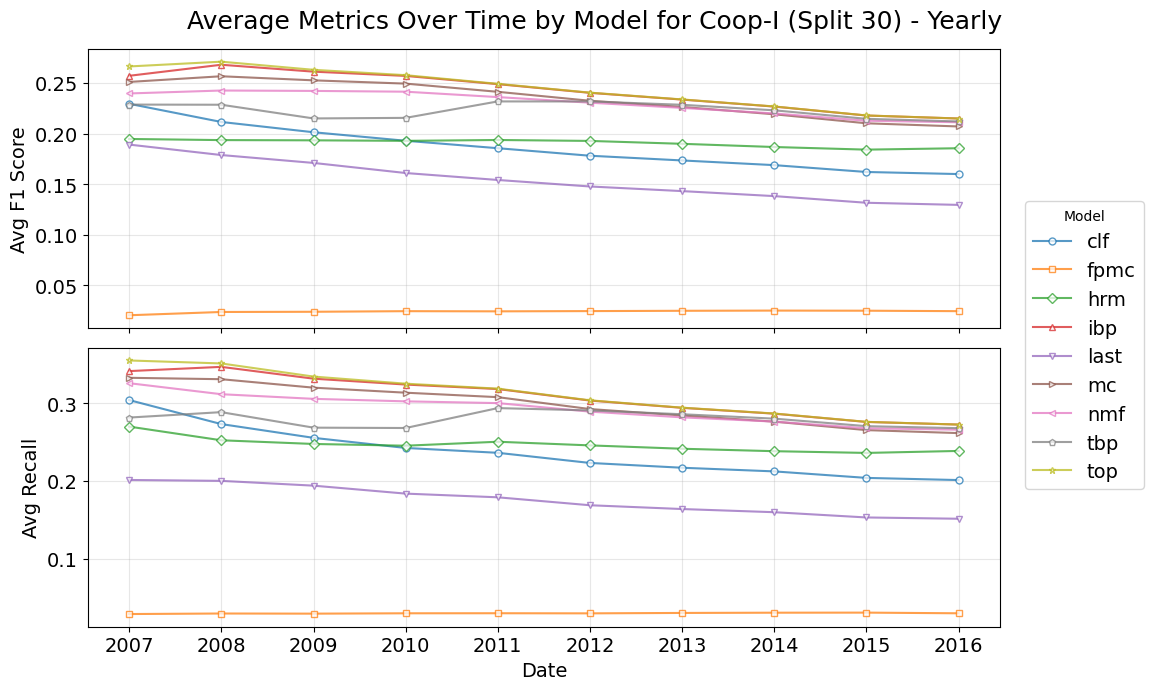

In [13]:
def plot_metrics_over_time_by_model(split, dataset, metrics=None, grouping='daily', rename_markov=False,
                               label_fontsize=12, title_fontsize=14, suptitle_fontsize=16, line_alpha=0.7):
    """
    Plot specified metrics over time for different models with a single legend on the right.
    
    Args:
        split: The data split to use
        dataset: The dataset to analyze
        metrics: List of metrics to plot. Each metric should be a tuple of (column_name, display_name)
                Default: [('avg_f1_score', 'Avg F1 Score'), 
                         ('avg_recall', 'Avg Recall'),
                         ('avg_hit_score', 'Avg Hit Score')]
        grouping: Time grouping ('daily', 'weekly', 'monthly', 'yearly')
        rename_markov: If True, replaces 'markov' with 'mc' in model names
        label_fontsize: Font size for x and y axis labels (default: 12)
        title_fontsize: Font size for subplot titles (default: 14)
        suptitle_fontsize: Font size for figure suptitle (default: 16)
        line_alpha: Transparency level for lines and markers (0-1, default: 0.7)
    """
    # Default metrics if none specified
    if metrics is None:
        metrics = [
            ('avg_f1_score', 'Avg F1 Score'),
            ('avg_recall', 'Avg Recall'),
            ('avg_hit_score', 'Avg Hit Score')
        ]

    # Load the file based on the specified split and dataset
    file_path = paths[dataset][split]
    df = pd.read_csv(file_path)

    # Convert 'date' column to datetime for proper time plotting
    df['date'] = pd.to_datetime(df['date'])

    # Rename 'markov' to 'mc' if specified
    if rename_markov:
        df['model_name'] = df['model_name'].str.replace('markov', 'mc', case=False)

    # Sort by model_name and date
    df = df.sort_values(by=['model_name', 'date'])

    # Group data based on the specified time frequency
    if grouping == 'daily':
        df['period'] = df['date'].dt.to_period('D')
    elif grouping == 'weekly':
        df['period'] = df['date'].dt.to_period('W')
    elif grouping == 'monthly':
        df['period'] = df['date'].dt.to_period('M')
    elif grouping == 'yearly':
        df['period'] = df['date'].dt.to_period('Y')
    else:
        raise ValueError("Grouping must be one of: 'daily', 'weekly', 'monthly', 'yearly'")

    # Calculate the mean for each model and time period
    agg_dict = {metric_col: ('mean') for metric_col, _ in metrics}
    df_grouped = df.groupby(['model_name', 'period']).agg(agg_dict).reset_index()
    df_grouped['date'] = df_grouped['period'].dt.to_timestamp()

    # Get a list of unique model names to plot each separately
    model_names = df_grouped['model_name'].unique()

    # Define line styles and markers to differentiate models
    line_styles = ['-', '--', '-.', ':']
    markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*']
    style_combinations = list(itertools.product(line_styles, markers))

    # Initialize the figure
    fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 3.5 * len(metrics)), sharex=True)
    fig.suptitle(f'Average Metrics Over Time by Model for {dataset.capitalize()}-I (Split {split}) - {grouping.capitalize()}',
                 fontsize=suptitle_fontsize)
    
    # Handle case where only one metric is plotted
    if len(metrics) == 1:
        axes = [axes]

    # Store lines for the legend
    lines = []
    labels = []

    # Plot each model's metrics on separate subplots
    for i, model in enumerate(model_names):
        model_data = df_grouped[df_grouped['model_name'] == model]
        line_style, marker = style_combinations[i % len(style_combinations)]

        for j, ((metric_col, metric_name), ax) in enumerate(zip(metrics, axes)):
            # Account for the new column names after aggregation
            plot_col = ('_').join([metric_col, 'mean']) if isinstance(df_grouped.columns, pd.MultiIndex) else metric_col
            line = ax.plot(model_data['date'], model_data[plot_col],
                         linestyle=line_style, marker=marker, markersize=5,
                         alpha=line_alpha,  # Add transparency to lines
                         markerfacecolor='white',  # Make marker face white
                         markeredgecolor=None)[0]  # Marker edge will take line color
            
            # Only store lines and labels from the first subplot for legend
            if j == 0:
                lines.append(line)
                labels.append(model)
            
            ax.set_ylabel(metric_name, fontsize=label_fontsize)
            ax.tick_params(axis='both', labelsize=label_fontsize)
            ax.grid(True, alpha=0.3)  # Also make grid slightly transparent

    # Set xlabel for the bottom subplot only
    axes[-1].set_xlabel('Date', fontsize=label_fontsize)

    # Add a single legend on the right side with adjusted font size
    fig.legend(lines, labels, 
              title='Model',
              bbox_to_anchor=(0.85, 0.5),
              loc='center left',
              bbox_transform=fig.transFigure,
              fontsize=label_fontsize)

    # Adjust layout to prevent legend overlap
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.savefig('time_series_1fE.png', dpi=900, bbox_inches='tight')
    plt.show()

# Example usage:
plot_metrics_over_time_by_model(30, 'coop',
    metrics=[
        ('avg_f1_score', 'Avg F1 Score'),
        ('avg_recall', 'Avg Recall')
    ],
    grouping='yearly',
    rename_markov=True,
    label_fontsize=14,
    title_fontsize=16,
    suptitle_fontsize=18,
    line_alpha=0.75)  # Adjust this value between 0 and 1 to control transparency